## Read data from the bucket

In [35]:
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [36]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

In [37]:
#search files
s3.ls('escience2022/Antoine/')

['escience2022/Antoine/.keep',
 'escience2022/Antoine/AMSR-E_ASI_sea_ice_concentration',
 'escience2022/Antoine/AMSR-E_ASI_snow',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration',
 'escience2022/Antoine/AMSR2_ASI_snow',
 'escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity',
 'escience2022/Antoine/Satellite_Arctic_DMS']

In [69]:
remote_files = 's3://escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-201209*.nc'
remote_files = s3.glob(remote_files)
remote_files

['escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120901-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120902-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120903-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120904-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120905-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120906-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120907-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120908-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120909-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120910-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120911-v5.4.nc',
 'escience

In [70]:
# Iterate through remote_files to create a fileset
fileset = [s3.open(file) for file in remote_files]

In [71]:
def paths_to_datetimeindex(paths):
    return  [datetime.strptime(date.split('/')[-1].split('-')[3], '%Y%m%d') for date in paths]

In [72]:
# Create variable used for time axis
time_var = xr.Variable('time', paths_to_datetimeindex(remote_files))

In [73]:
time_var

<xarray.Variable (time: 30)>
array(['2012-09-01T00:00:00.000000000', '2012-09-02T00:00:00.000000000',
       '2012-09-03T00:00:00.000000000', '2012-09-04T00:00:00.000000000',
       '2012-09-05T00:00:00.000000000', '2012-09-06T00:00:00.000000000',
       '2012-09-07T00:00:00.000000000', '2012-09-08T00:00:00.000000000',
       '2012-09-09T00:00:00.000000000', '2012-09-10T00:00:00.000000000',
       '2012-09-11T00:00:00.000000000', '2012-09-12T00:00:00.000000000',
       '2012-09-13T00:00:00.000000000', '2012-09-14T00:00:00.000000000',
       '2012-09-15T00:00:00.000000000', '2012-09-16T00:00:00.000000000',
       '2012-09-17T00:00:00.000000000', '2012-09-18T00:00:00.000000000',
       '2012-09-19T00:00:00.000000000', '2012-09-20T00:00:00.000000000',
       '2012-09-21T00:00:00.000000000', '2012-09-22T00:00:00.000000000',
       '2012-09-23T00:00:00.000000000', '2012-09-24T00:00:00.000000000',
       '2012-09-25T00:00:00.000000000', '2012-09-26T00:00:00.000000000',
       '2012-09-27T00:00:00.000000000', '2012-09-28T00:00:00.000000000',
       '2012-09-29T00:00:00.000000000', '2012-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

## Concatenate all the file

In [74]:
# Load in and concatenate all individual .nc files
dset = xr.concat([xr.open_mfdataset([i],) for i in fileset],
                        dim=time_var)

In [75]:
dset

<xarray.Dataset>
Dimensions:              (time: 30, x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-09-01 ... 2012-09-30
Data variables:
    polar_stereographic  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    z                    (time, y, x) float32 dask.array<chunksize=(1, 1792, 1216), meta=np.ndarray>
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:52:12 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

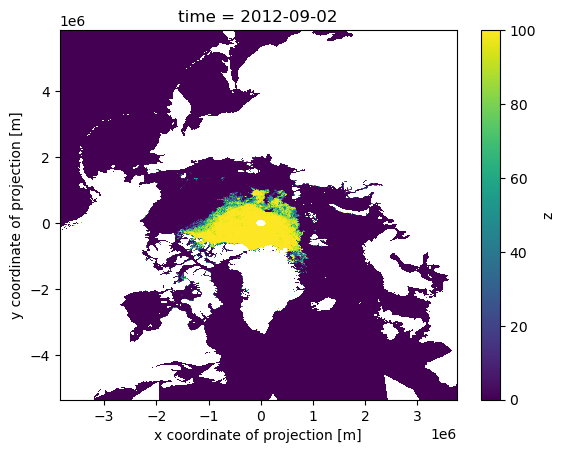

In [76]:
dset.z.isel(time = 1).plot()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

dset.z.isel(time = 1).plot.pcolormesh(ax = ax,transform=ccrs.epsg(3411))
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()

In [77]:
area = 6.25**2
ice = dset.z.isel(time = 0)
ice_m = ice.where(ice >= 15)
var = ice_m/ice_m

In [79]:
area*var.sum().values

3251835.9375

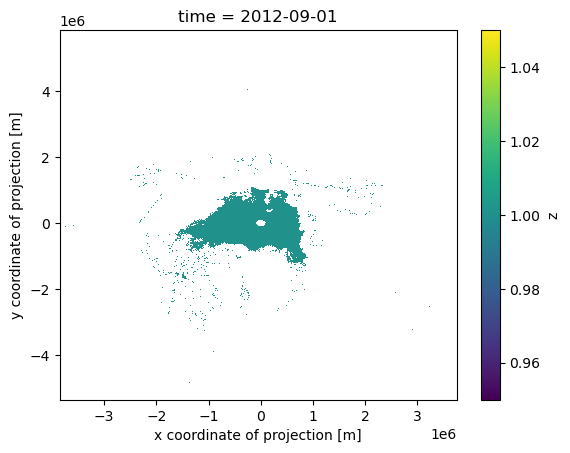

In [78]:
var.plot()

## Options for trying to change the projections

In [18]:
#dset.rio.write_grid_mapping(inplace=True)
dset.rio.write_crs("epsg:3411", inplace=True)

<xarray.Dataset>
Dimensions:              (time: 30, x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-07-02 ... 2012-07-31
    spatial_ref          int64 0
Data variables:
    polar_stereographic  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    z                    (time, y, x) float32 dask.array<chunksize=(1, 1792, 1216), meta=np.ndarray>
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:50:27 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [19]:
ds_in_lonlat = dset.rio.reproject("epsg:4326", shape=(1792,1216))

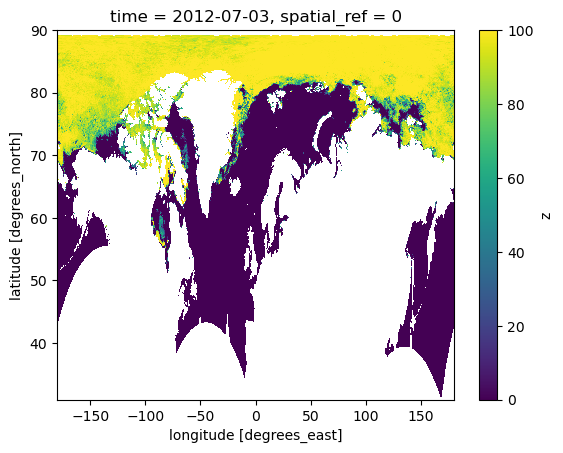

In [21]:
ds_in_lonlat.z.isel(time = 1).plot()

In [24]:
source_crs = 'epsg:3411' # Coordinate system of the file
target_crs = 'epsg:4326' # Global lat-lon coordinate system

polar_to_latlon = pyproj.Transformer.from_crs(source_crs, target_crs)

In [32]:
polar_to_latlon

<Concatenated Operation Transformer: pipeline>
Description: Inverse of US NSIDC Sea Ice polar stereographic north + Ballpark geographic offset from Unspecified datum based upon the Hughes 1980 ellipsoid to WGS 84
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [33]:
#Y, X = np.meshgrid(dset.y, dset.x)
lat, lon = polar_to_latlon.transform(dset.y, dset.x)

ProjError: x, y, z, and time must be same size if included.

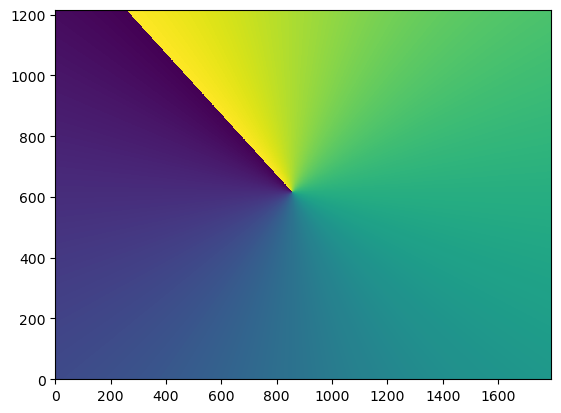

In [26]:
plt.pcolormesh(lon)

In [27]:
dset.coords

Coordinates:
  * x            (x) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y            (y) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06
  * time         (time) datetime64[ns] 2012-07-02 2012-07-03 ... 2012-07-31
    spatial_ref  int64 0

In [137]:
polar_to_latlon

<Concatenated Operation Transformer: pipeline>
Description: Inverse of US NSIDC Sea Ice polar stereographic north + Ballpark geographic offset from Unspecified datum based upon the Hughes 1980 ellipsoid to WGS 84
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [31]:
dset.assign_coords({"lon": lon, "lat": lat})

MissingDimensionsError: cannot set variable 'lon' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.